## @DATA VISUALIZATION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/Heart.csv')
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [7]:
# Checking for columns with null values

data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [8]:
# Deleting data with null values as their percentage of the total dataset is very less

data.dropna(how='any', axis=0, inplace=True)

In [9]:
num_cols = data.select_dtypes(include=['int', 'float']).columns
cat_cols = data.select_dtypes(include=['object']).columns

cols = data.columns

print(len(num_cols))
print(len(cat_cols))

11
3


In [10]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


### @SNS.HISTPLOT and DF.HIST - . A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

<AxesSubplot:xlabel='Age', ylabel='Count'>

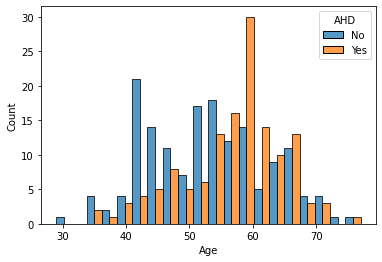

In [11]:
sns.histplot(data=data, x='Age', bins=20, hue='AHD', multiple='dodge')

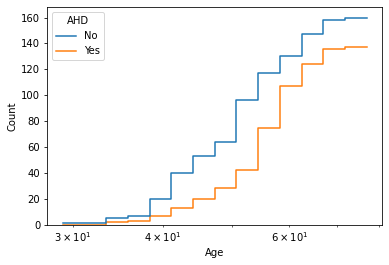

In [12]:
sns.histplot(data, x = "Age", log_scale = True, fill = False, element = 'step', cumulative = True, hue = "AHD")
plt.show()

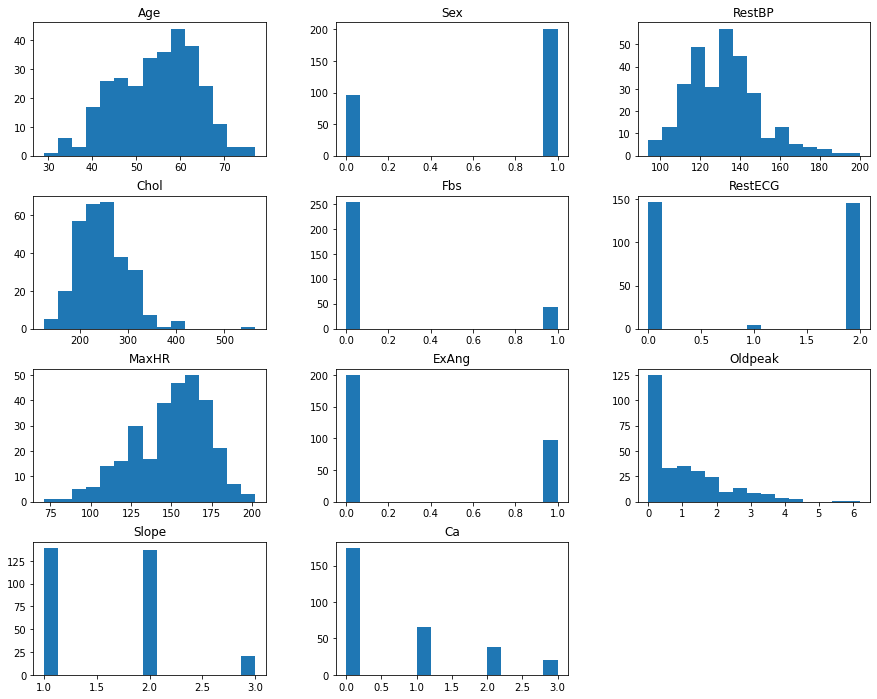

In [13]:
data[num_cols].hist(bins=15, figsize=(15,12), grid = False)
plt.show()

<AxesSubplot:>

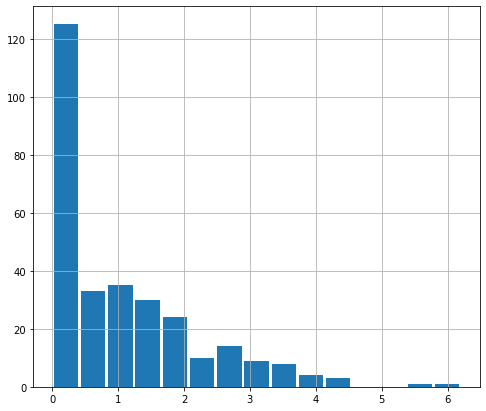

In [14]:
 data['Oldpeak'].hist(bins=15, figsize=(8,7), grid = True, rwidth = 0.9)

### @SNS.DISPLOT This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots.

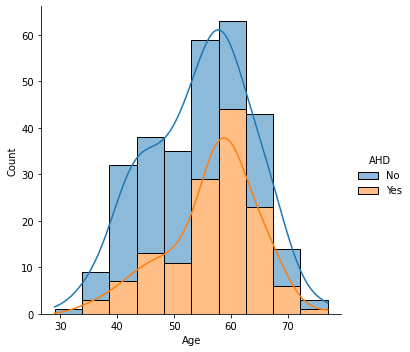

In [15]:
sns.displot(data, x='Age', kind='hist', multiple='stack', kde=True, hue='AHD', bins=10)

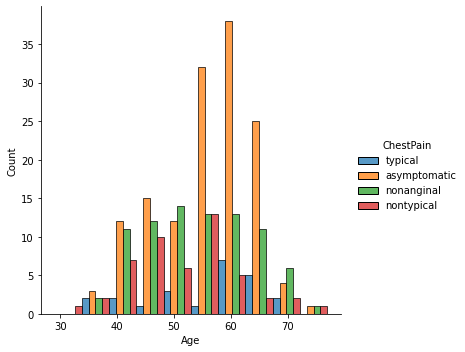

In [16]:
sns.displot(data, x='Age', hue='ChestPain', multiple='dodge', bins=10 )

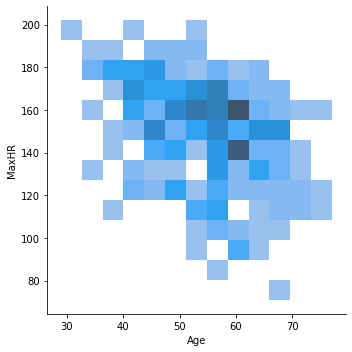

In [17]:
sns.displot(data, x= 'Age', y='MaxHR')

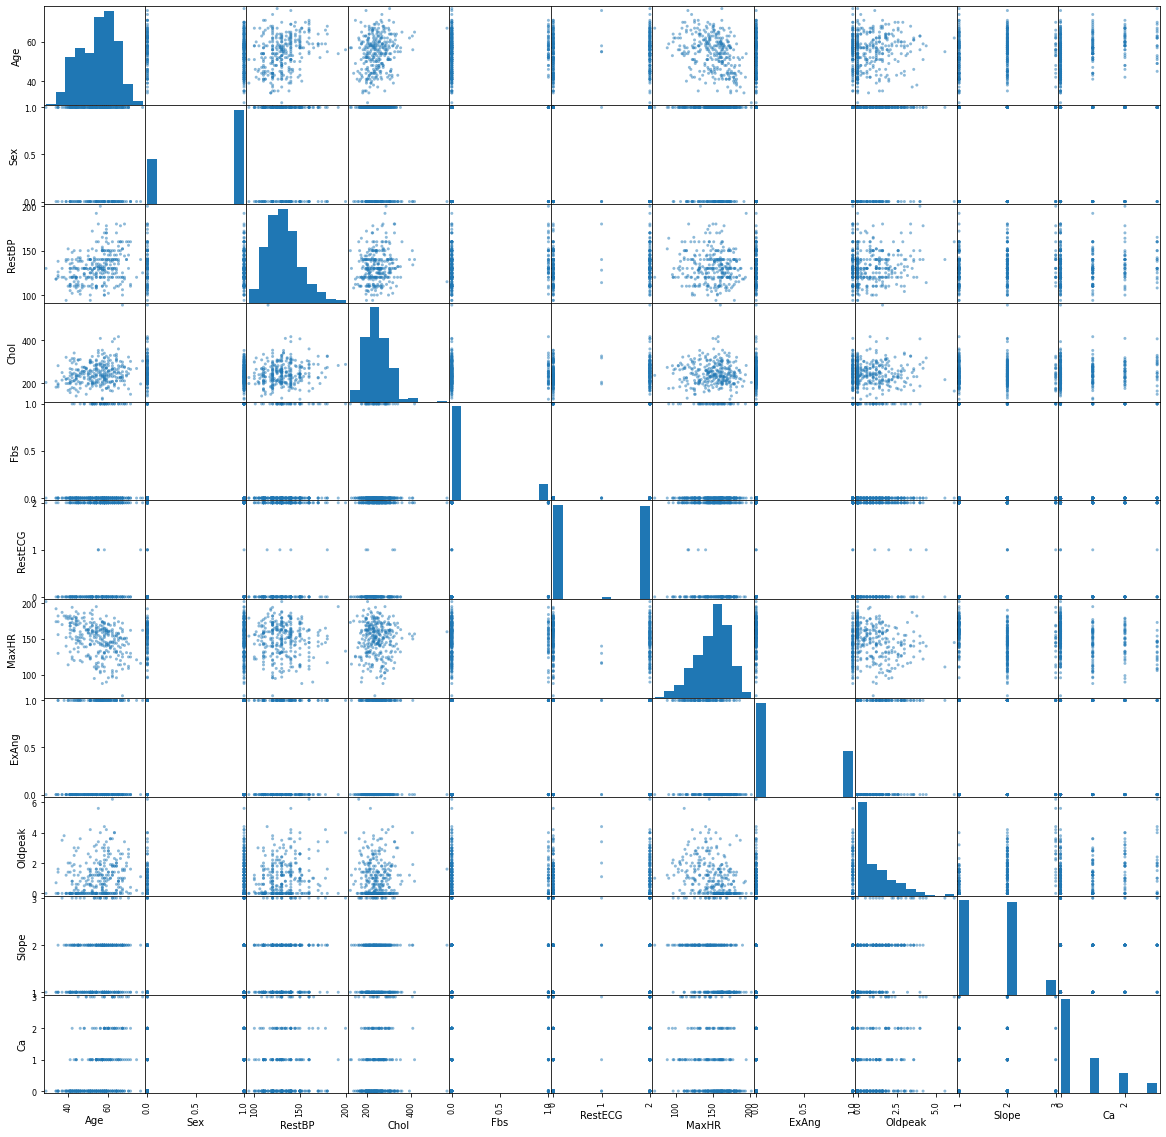

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,20), )
plt.show()

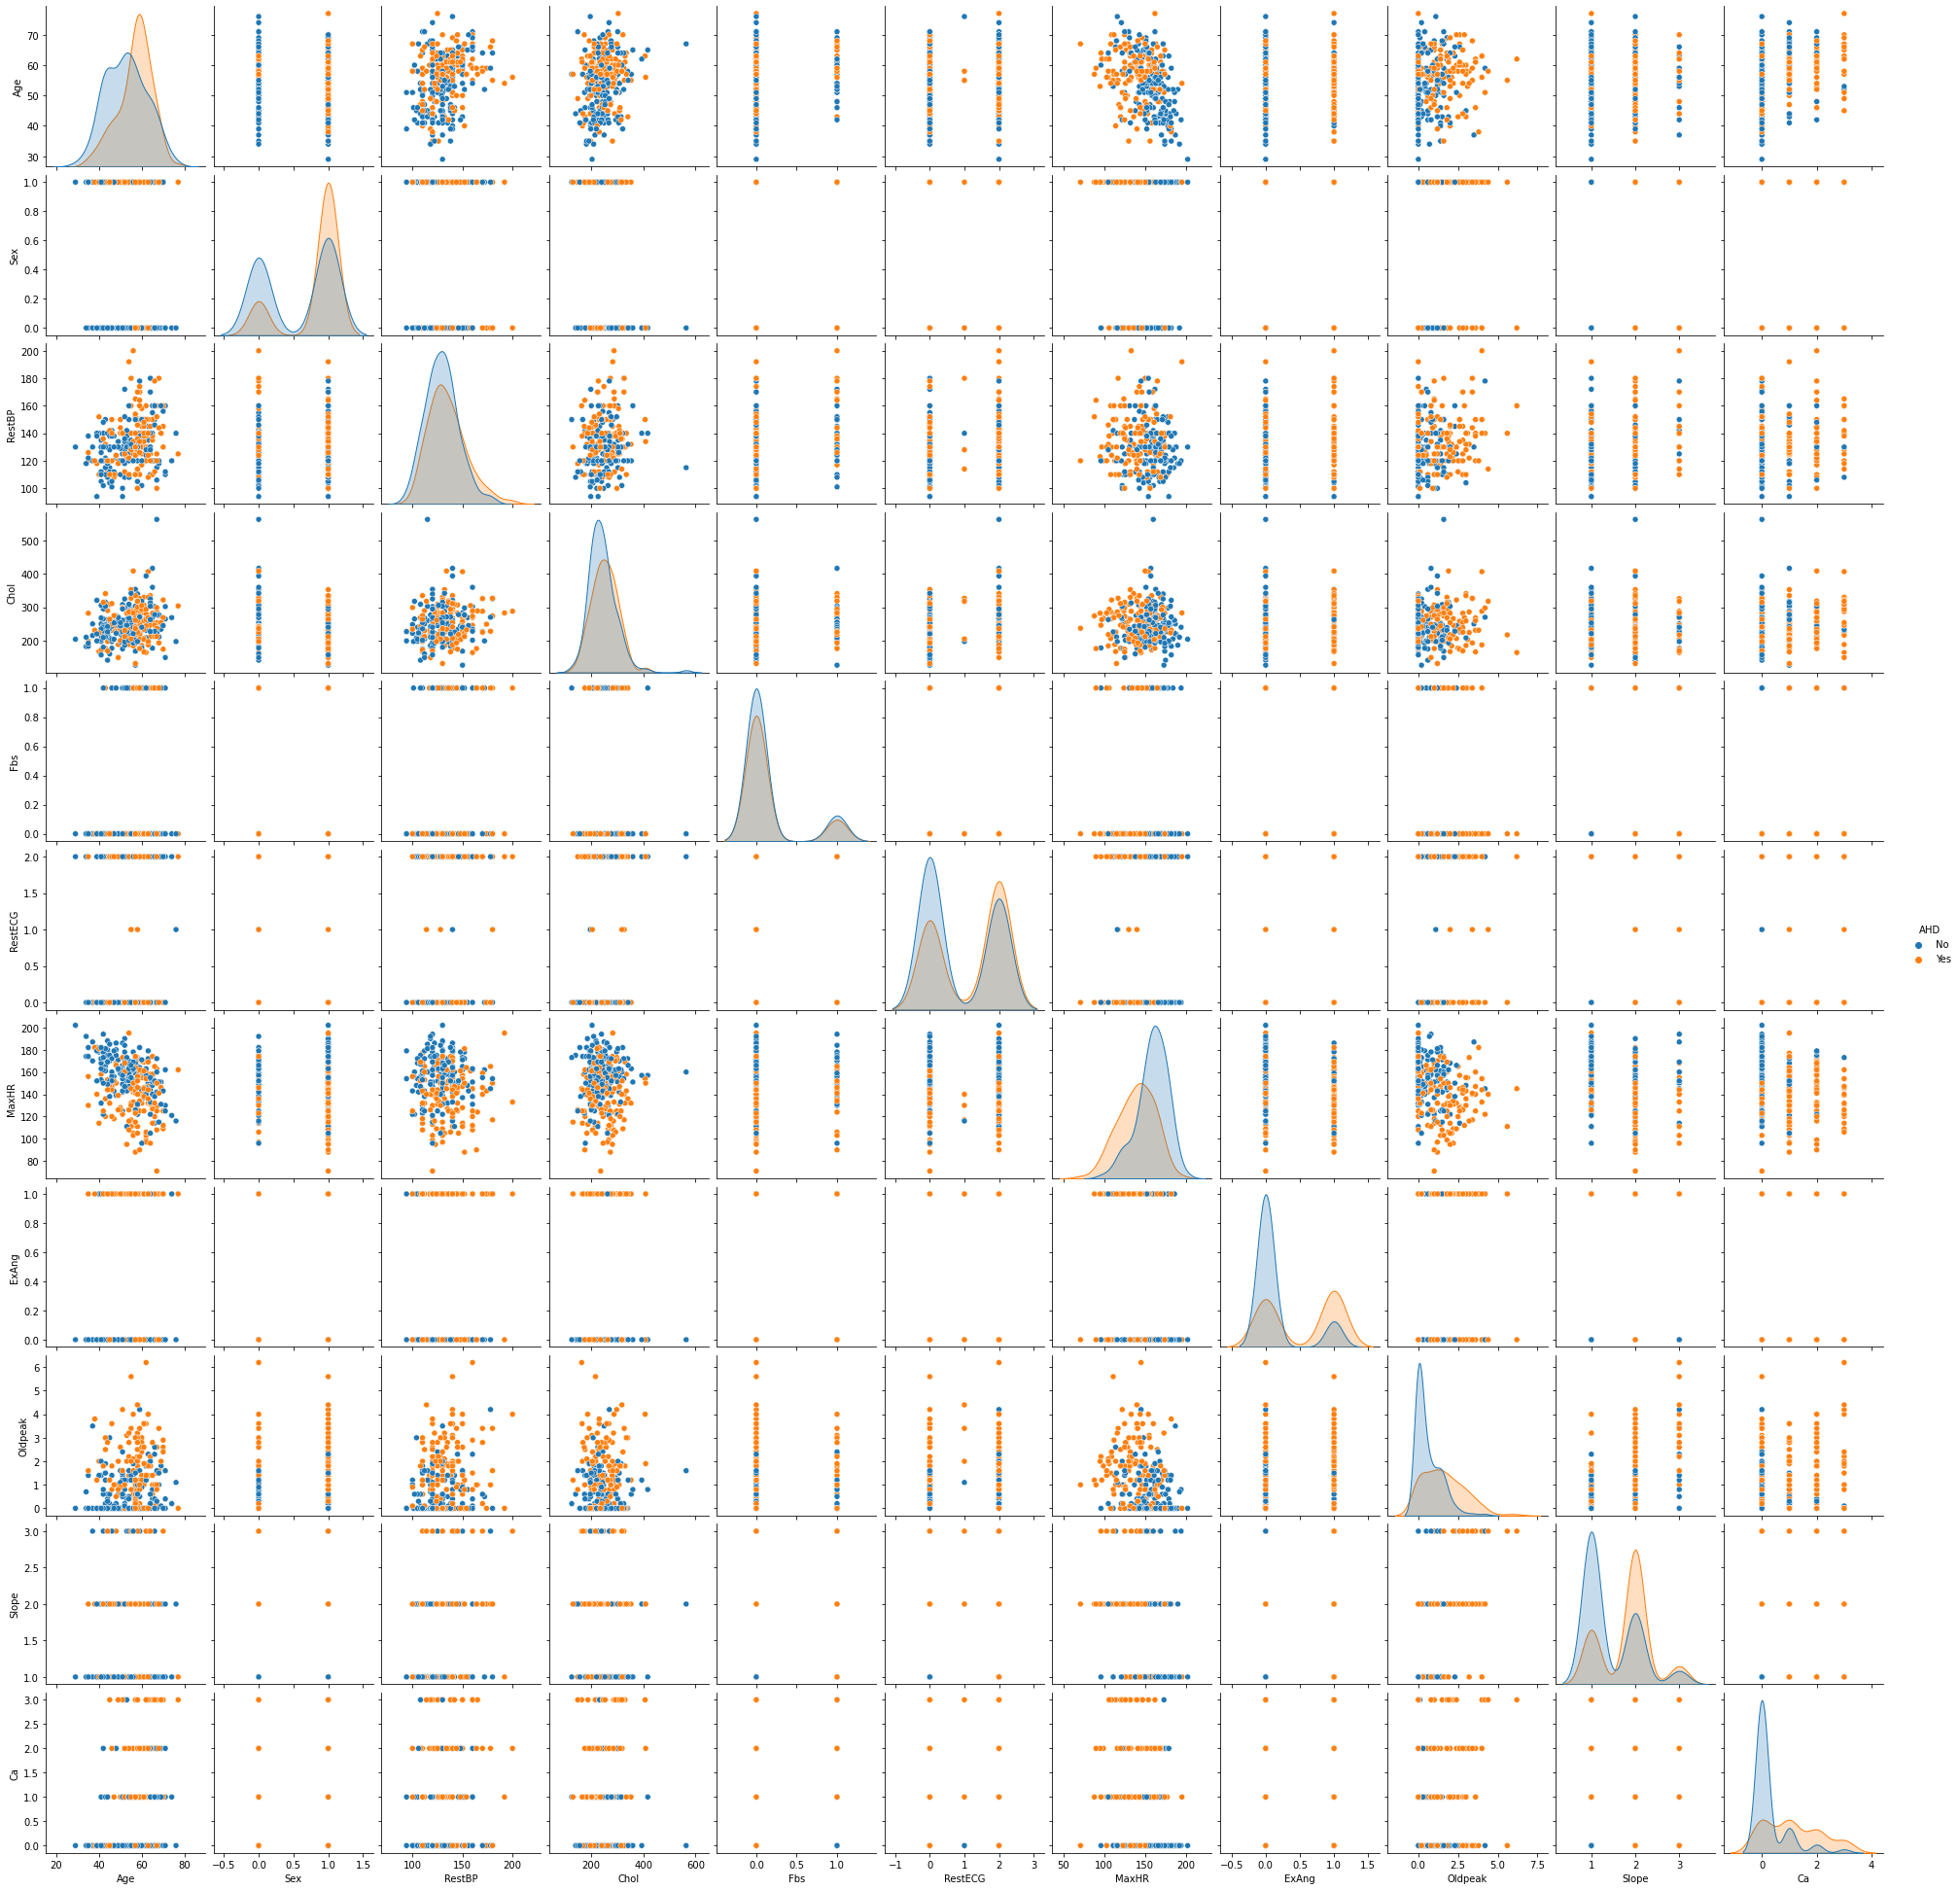

In [19]:
sns.pairplot(data, kind='scatter', hue='AHD', diag_kind = 'kde')
plt.show()

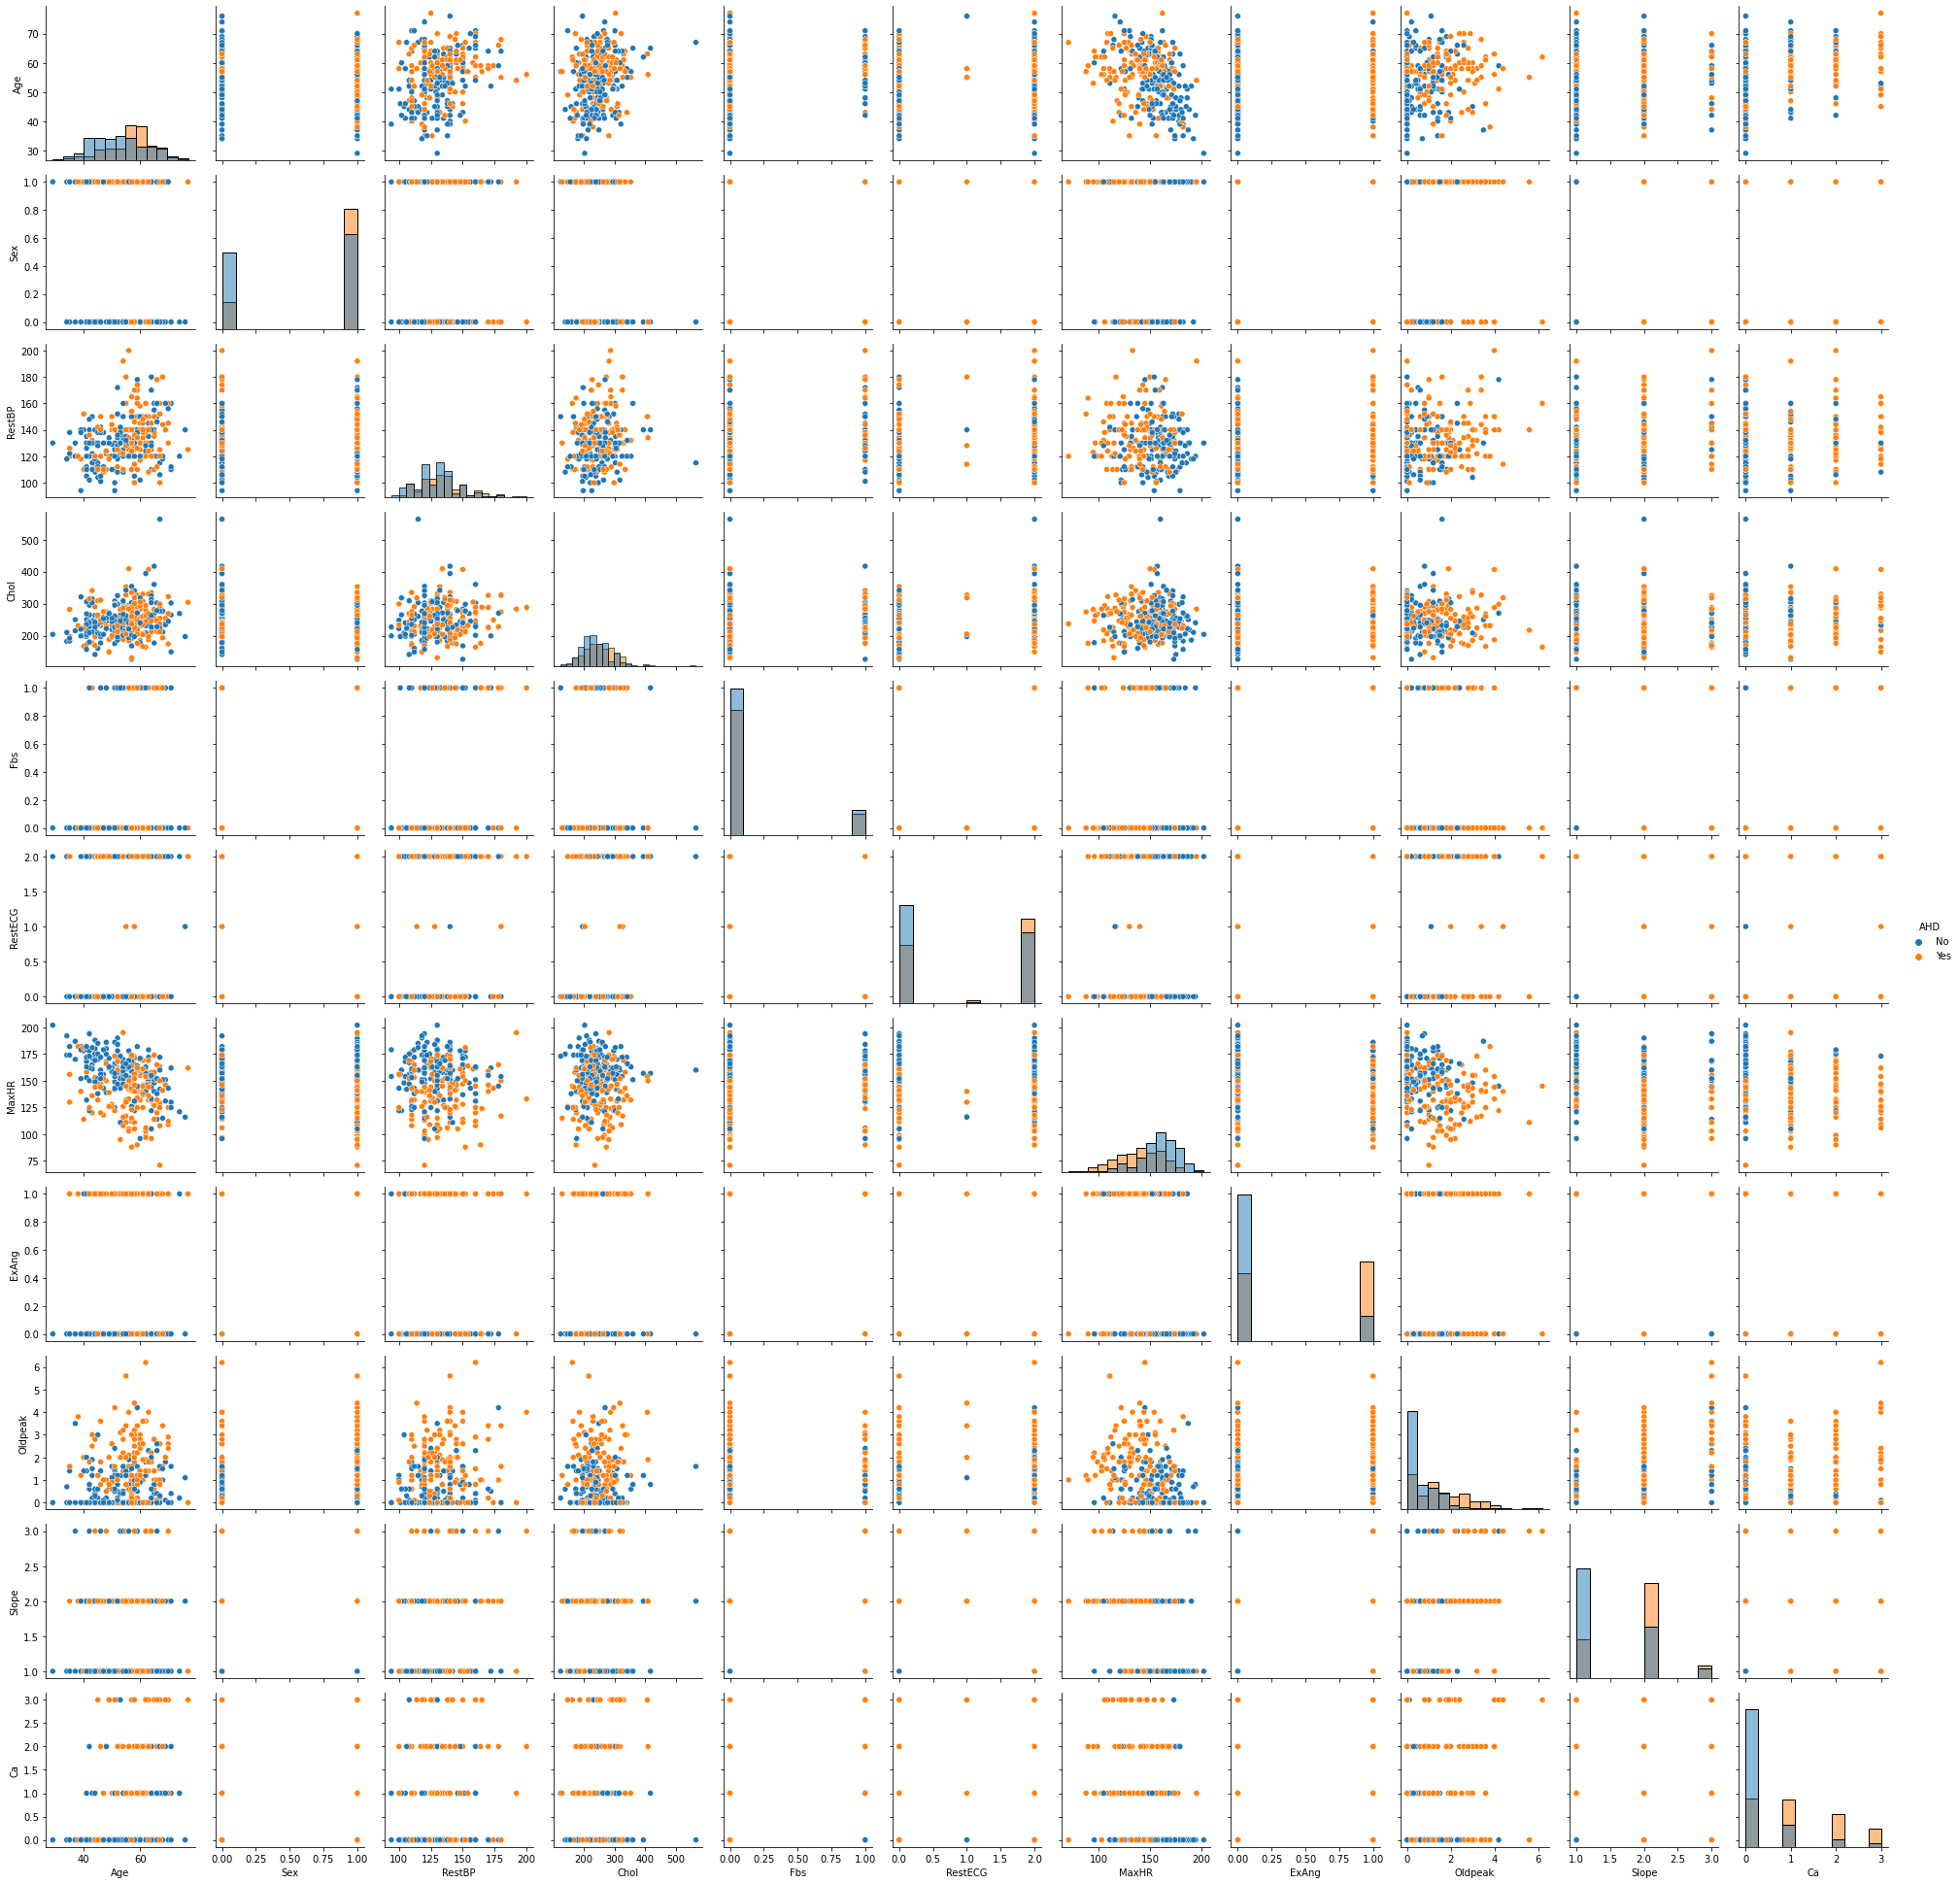

In [20]:
pp = sns.PairGrid(data, vars = num_cols, hue='AHD')
pp.map_diag(sns.histplot)
pp.map_offdiag(sns.scatterplot)
pp.add_legend()
plt.show()

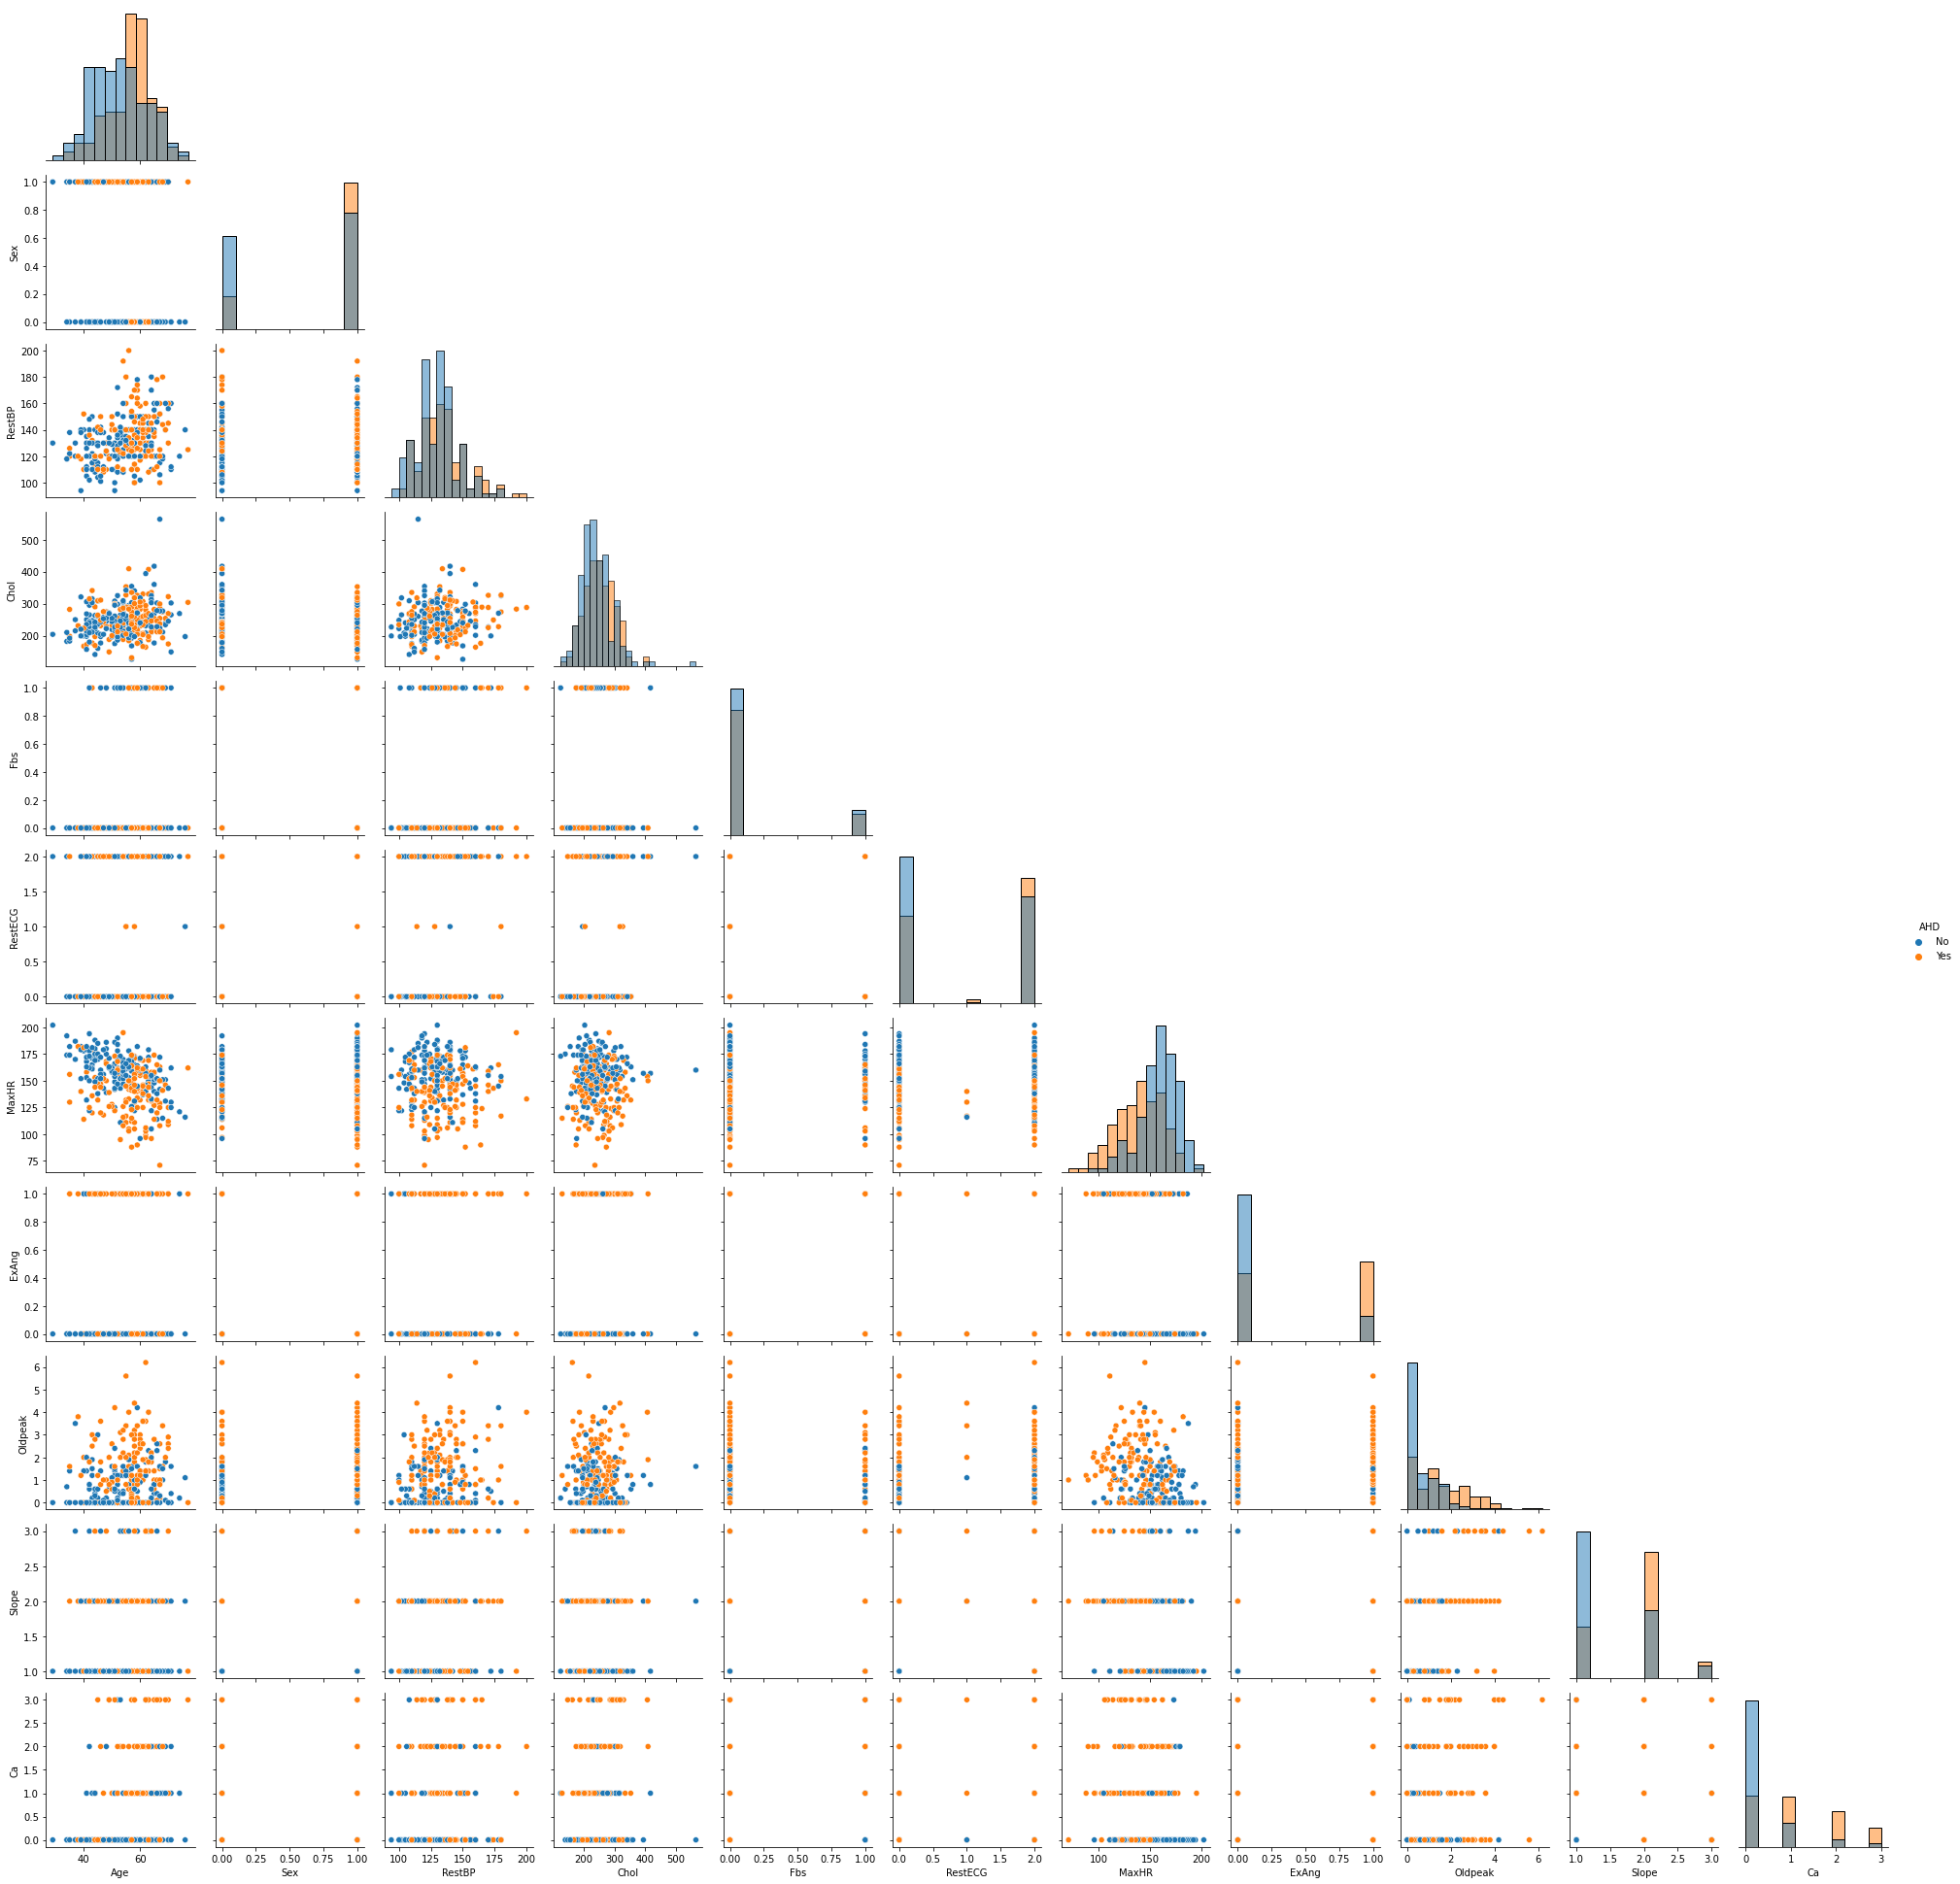

In [21]:
pp = sns.PairGrid(data, vars = num_cols, hue='AHD', diag_sharey=False, corner = True)
pp.map_diag(sns.histplot)
# pp.map_offdiag(sns.scatterplot)
pp.map_lower(sns.scatterplot)
pp.add_legend()
plt.show()

### @SNS.BARPLOT 
 It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value (The value on the y-axis is its mean by default).

In [22]:
data['Age'].min()

m = data.groupby(['ChestPain'])
for x,y in m:
    
    print(f'{x} - {y.Age.mean()}')

asymptomatic - 55.83802816901409
nonanginal - 53.91566265060241
nontypical - 51.224489795918366
typical - 55.869565217391305


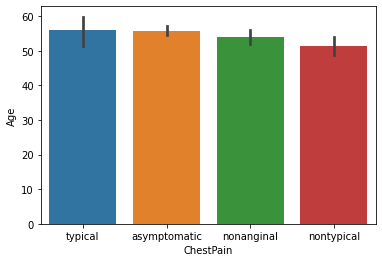

In [23]:
sns.barplot(data=data, x='ChestPain', y='Age')
plt.show()

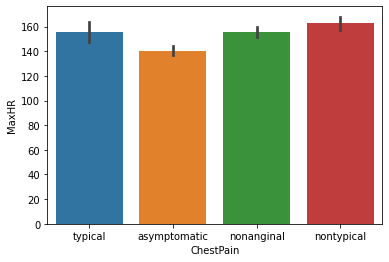

In [24]:
sns.barplot(data=data, x='ChestPain', y='MaxHR')
plt.show()

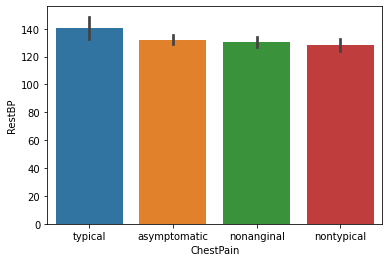

In [25]:
sns.barplot(data=data, x='ChestPain', y='RestBP')
plt.show()

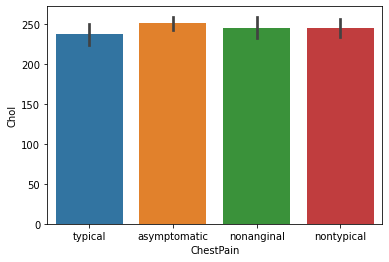

In [26]:
sns.barplot(data=data, x='ChestPain', y='Chol')
plt.show()

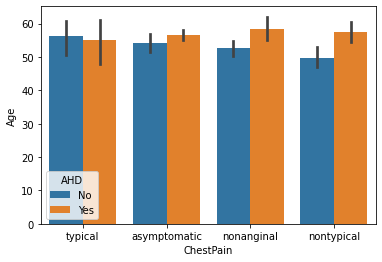

In [27]:
sns.barplot(data=data, x='ChestPain', y='Age', hue='AHD')
plt.show()

### @SNS.COUNTPLOT show the relationship between a numerical and a categorical variable¶

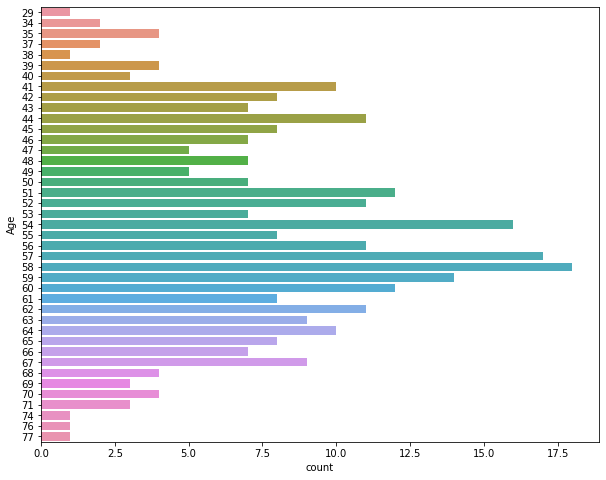

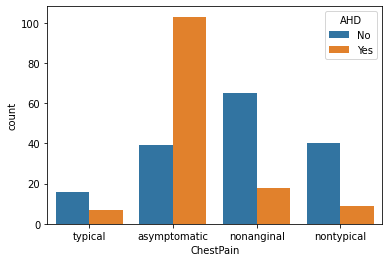

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(y = "Age", data = data)
plt.show()

sns.countplot(x = "ChestPain", data = data,hue = "AHD")
plt.show()

### @SNS.CATPLOT show the relationship between a numerical and one or more categorical variables

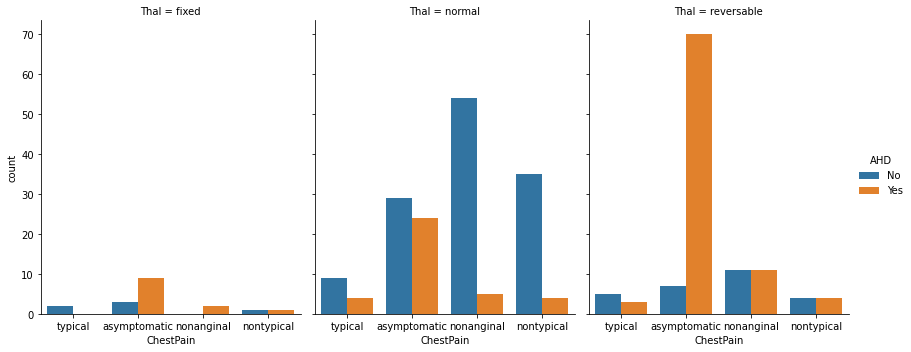

In [29]:
''' In this plot we first group the data w.r.t 'Thal' column and then plot their count with x-axis
as 'ChestPain' categorical variable and setting hue as 'AMD' the target variable '''

sns.catplot(data=data, x='ChestPain', hue='AHD', col = "Thal", kind = "count", height = 5, aspect = 0.8)
plt.show()

### @HEXBINPLOT -  A hexbin plot is useful to represent the relationship of 2 numerical variables when you have a lot of data points. Without overlapping of the points, the plotting window is split into several hexbins. The color of each hexbin denotes the number of points in it.

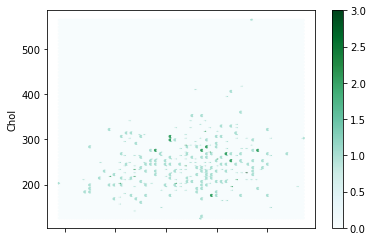

In [30]:
data.plot.hexbin(x='Age', y='Chol')
plt.show()

### SNS.JOINTPLOT -  Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot

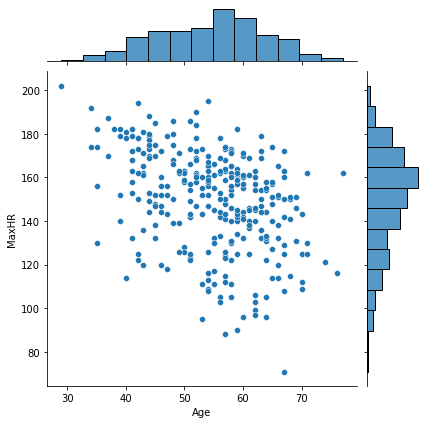

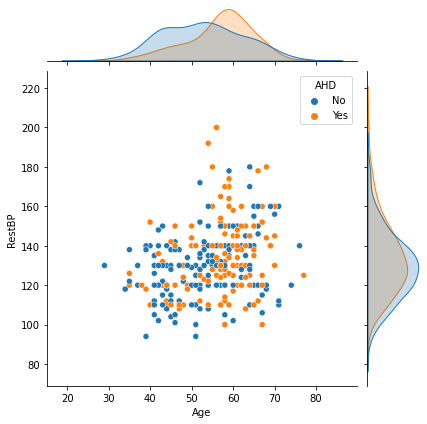

In [31]:
sns.jointplot(data=data, x='Age', y='MaxHR')
plt.show()

sns.jointplot(data=data, x='Age', y='RestBP', hue='AHD')
plt.show()

### @SNS.REGPLOT - 
 This method is used to plot data and a linear regression model fit. There are a number of mutually exclusive options for estimating the regression model.

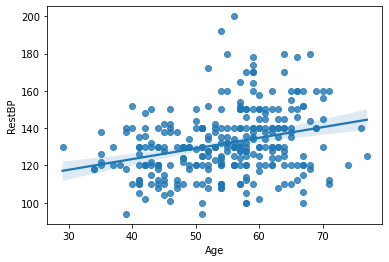

In [32]:
sns.regplot(data=data, x = 'Age', y='RestBP')
plt.show()

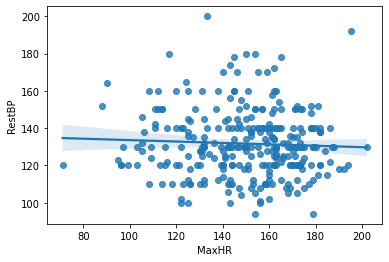

In [33]:
sns.regplot(data=data, x='MaxHR', y='RestBP')
plt.show()

### @ Matplotlib.pyplot.barh
A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

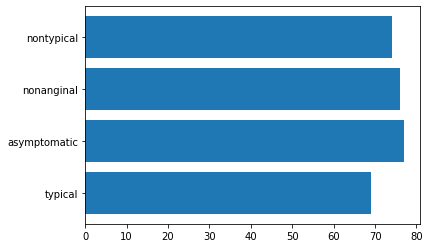

In [34]:
plt.barh(data['ChestPain'], data['Age'])
plt.show()

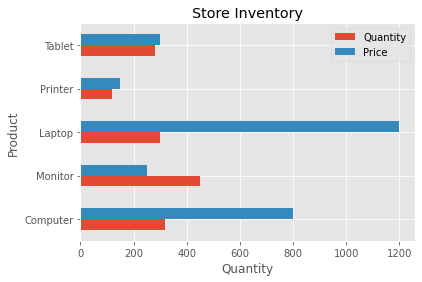

In [35]:
samp_data = {'Quantity': [320,450,300,120,280],
        'Price': [800,250,1200,150,300]
       }
df = pd.DataFrame(samp_data, columns=['Quantity','Price'], index = ['Computer','Monitor','Laptop','Printer','Tablet'])

plt.style.use('ggplot')

df.plot.barh()

plt.title('Store Inventory')
plt.ylabel('Product')
plt.xlabel('Quantity')
plt.show()

### @ SNS.VIOLINPLOT 
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

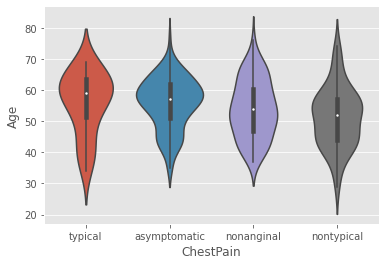

In [36]:
sns.violinplot(data=data, x='ChestPain', y='Age')
plt.show()

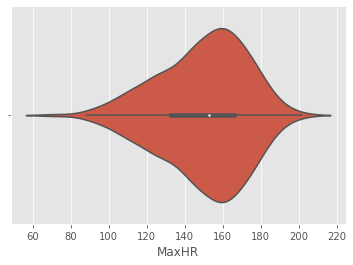

In [37]:
sns.violinplot(data=data, x='MaxHR')
plt.show()

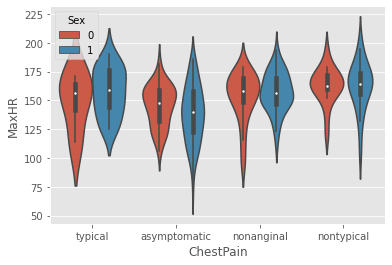

In [38]:
sns.violinplot(data=data, x='ChestPain', y='MaxHR', hue='Sex')
plt.show()

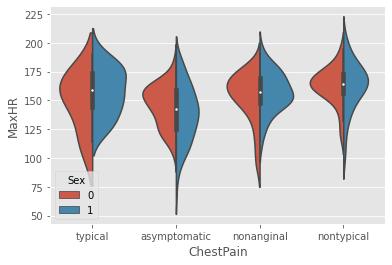

In [39]:
sns.violinplot(data=data, x='ChestPain', y='MaxHR', hue='Sex', split=True)
plt.show()

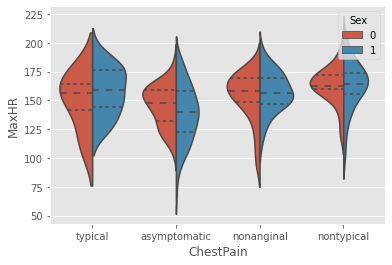

In [40]:
sns.violinplot(data=data, x='ChestPain', y='MaxHR', hue='Sex', split=True, inner='quartile')
plt.show()

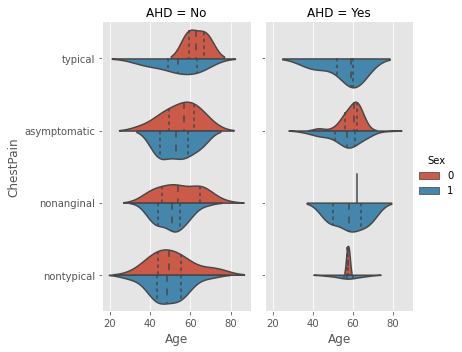

In [41]:
sns.catplot(data = data, y = 'ChestPain', x = "Age", hue ="Sex", split=True, inner = 'quartile',
           kind = 'violin', col = 'AHD',
           height = 5, aspect = 0.6)
plt.show()

### @SNS.STRIPPLOT

Draw a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

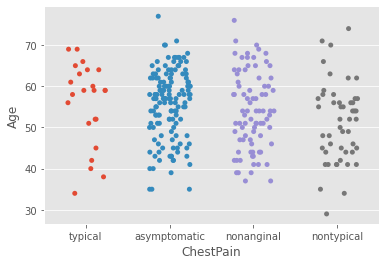

In [42]:
sns.stripplot(data=data, x='ChestPain', y='Age', jitter = 0.25)
plt.show()

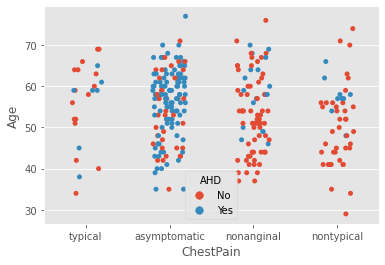

In [43]:
sns.stripplot(data=data, x='ChestPain', y='Age', hue='AHD', jitter=0.20)
plt.show()

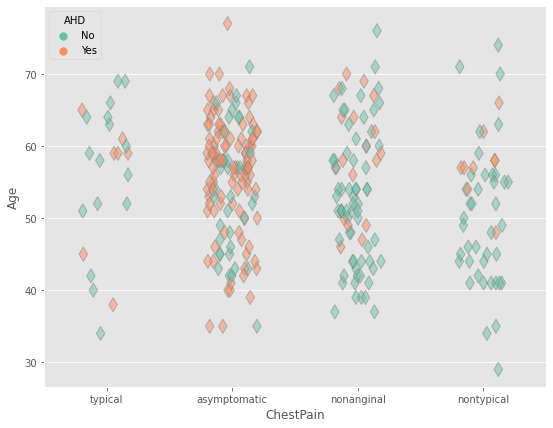

In [44]:
plt.figure(figsize=(9,7))
sns.stripplot(data=data, x='ChestPain', y='Age', hue='AHD', jitter=0.20,palette = "Set2",
              linewidth = 1, edgecolor = 'grey', marker = 'd', size = 10, alpha = 0.5)
plt.show()


<AxesSubplot:xlabel='ChestPain', ylabel='Age'>

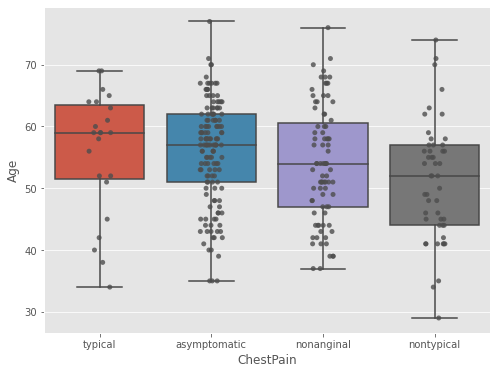

In [45]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = "ChestPain", y = "Age", data = data)
sns.stripplot(x = "ChestPain", y = "Age", data = data, color = "0.3", alpha = 0.8)

<AxesSubplot:xlabel='ChestPain', ylabel='Age'>

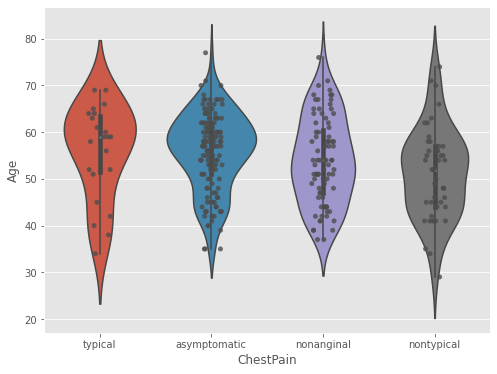

In [46]:
plt.figure(figsize = (8, 6))
sns.violinplot(x = "ChestPain", y = "Age", data = data)
sns.stripplot(x = "ChestPain", y = "Age", data = data, color = "0.3", alpha = 0.8)

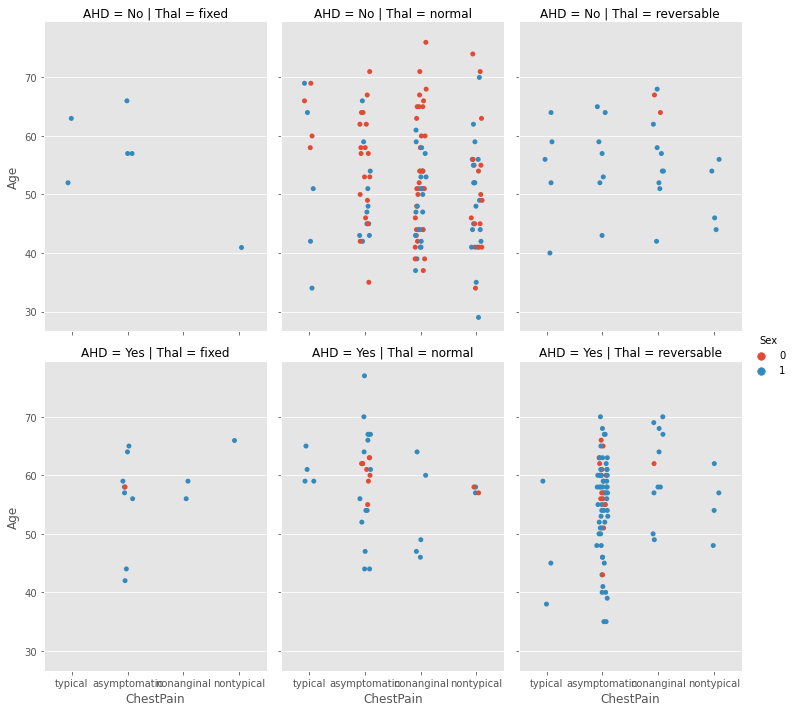

In [47]:
### USING CATPLOT TO PLOT 5 DIFFERENT VARIABLES

sns.catplot(x = "ChestPain", y = "Age", hue = "Sex", col = 'Thal', row = "AHD", data = data, kind = "strip",
            height = 5, aspect = 0.7)
plt.show()

### SNS.RELPLOT
This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

    scatterplot() (with kind="scatter"; the default)

    lineplot() (with kind="line")

<function matplotlib.pyplot.show(close=None, block=None)>

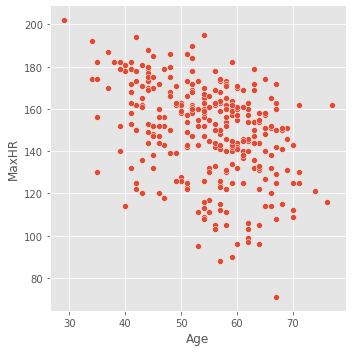

In [48]:
sns.relplot(data=data, x='Age', y ='MaxHR')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

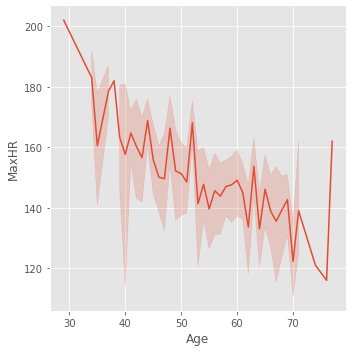

In [49]:
sns.relplot(data=data, x='Age', y ='MaxHR',  kind='line')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

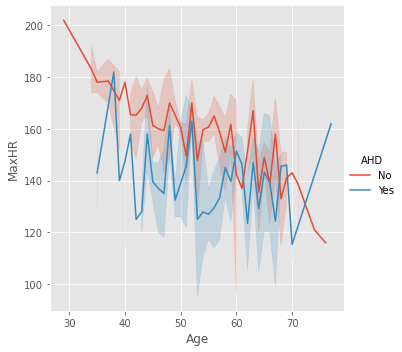

In [50]:
sns.relplot(data=data, x='Age', y ='MaxHR',  kind='line', hue='AHD')
plt.show

In [52]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [53]:
flt_data_pvt = flights_data.pivot("year", "month", "passengers") 
flt_data_pvt

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


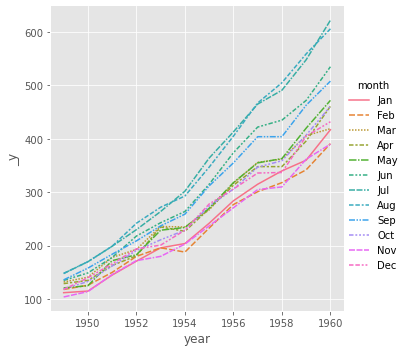

In [57]:
sns.relplot(data=flt_data_pvt, kind='line')

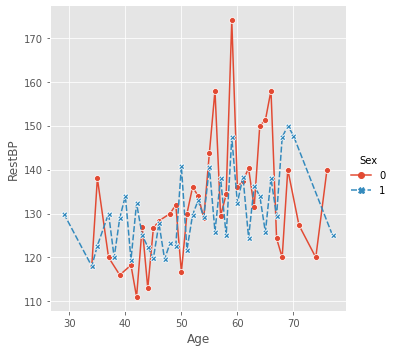

In [61]:
sns.relplot(data=data, x='Age', y='RestBP', kind = 'line', ci = None, hue = "Sex", 
            dashes = True, style = "Sex", markers= True)
plt.show()